In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
import xgboost
from xgboost import XGBRegressor
import lightgbm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing, metrics, svm, tree, ensemble, neighbors, linear_model, model_selection,cluster
# sns.set_style("dark-grid")
sns.set_theme(style="darkgrid")
palette_name = 'gist_heat'

/home/piranha/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
df=pd.read_excel('./Train_data.xlsx')
df.columns=[col.lower().replace(" ","_") if type(col) == str else col.strftime('%b-%Y')  for col in df.columns ]
df.warehouse_id=df.warehouse_id+"-"+df.region
# df.drop(columns=['region'],inplace=True)

In [3]:
pd.DataFrame(df.groupby(['warehouse_id']).count()).iloc[:,1]

warehouse_id
Wh-1-NORTH    233
Wh-2-EAST     212
Wh-3-WEST     308
Wh-4-SOUTH    286
Name: sku_id, dtype: int64

Text(0.5, 1.0, 'No of Products in each warehouse/region')

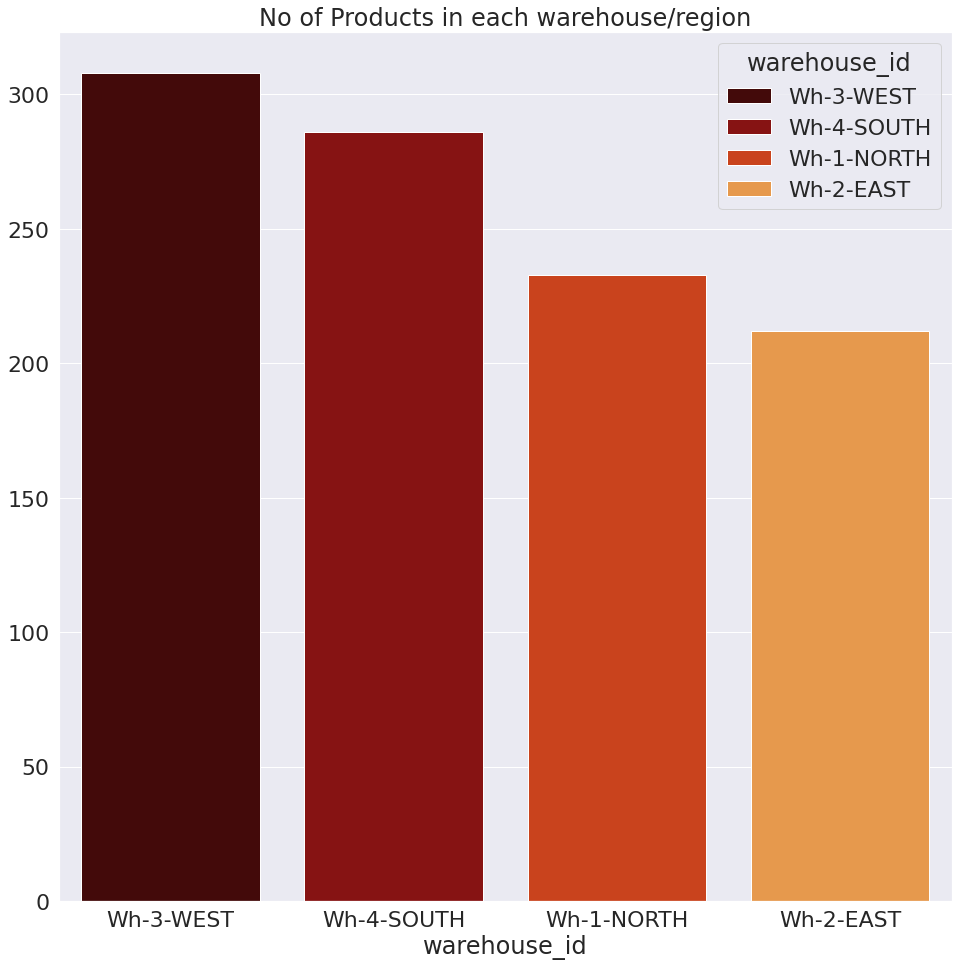

In [4]:
sns.set(font_scale=2)
plt.figure(figsize=(16,16))
counts = pd.DataFrame(df.groupby(['warehouse_id']).count()).iloc[:,1].sort_values(ascending=False)
sns.barplot(x=counts.index,y=counts.values,palette=palette_name,hue=counts.index,dodge=False)
plt.title("No of Products in each warehouse/region")
# plt.rc('ytick',labelsize = 10)
# plt.rc('axes',labelsize = 10)
# plt.legend(y=counts.values)
# _=plt.xticks(rotation="0")

In [5]:
time_data=df.T.iloc[2:]
time_data.columns=time_data.iloc[0,:].tolist()
time_data=time_data.iloc[1:,:].astype(int)
time_data.index=pd.to_datetime(time_data.index)

In [6]:
df.iloc[:,3:]

,Apr-2018,May-2018,Jun-2018,Jul-2018,Aug-2018,Sep-2018,Oct-2018,Nov-2018,Dec-2018,Jan-2019,...,Aug-2020,Sep-2020,Oct-2020,Nov-2020,Dec-2020,Jan-2021,Feb-2021,Mar-2021,Apr-2021,May-2021
0,27,13,30,14,22,8,8,8,8,8,...,12,8,8,8,8,8,14,16,8,12
1,88,28,127,130,58,10,7,7,7,13,...,16,7,7,7,7,7,13,43,13,43
2,6,6,6,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,162,184,110,172,90,40,18,26,18,66,...,82,78,38,18,22,28,36,352,58,18
4,171,402,627,615,300,417,141,42,72,33,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,7,7,7,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,49,25,41,13,21,53,33,21,67,21,...,9,9,21,133,9,33,9,103,49,9
1036,21,13,13,21,29,21,21,29,13,13,...,13,13,13,13,13,21,13,13,13,13
1037,15,13,13,11,9,11,36,15,21,15,...,9,9,17,13,11,36,21,17,9,9


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

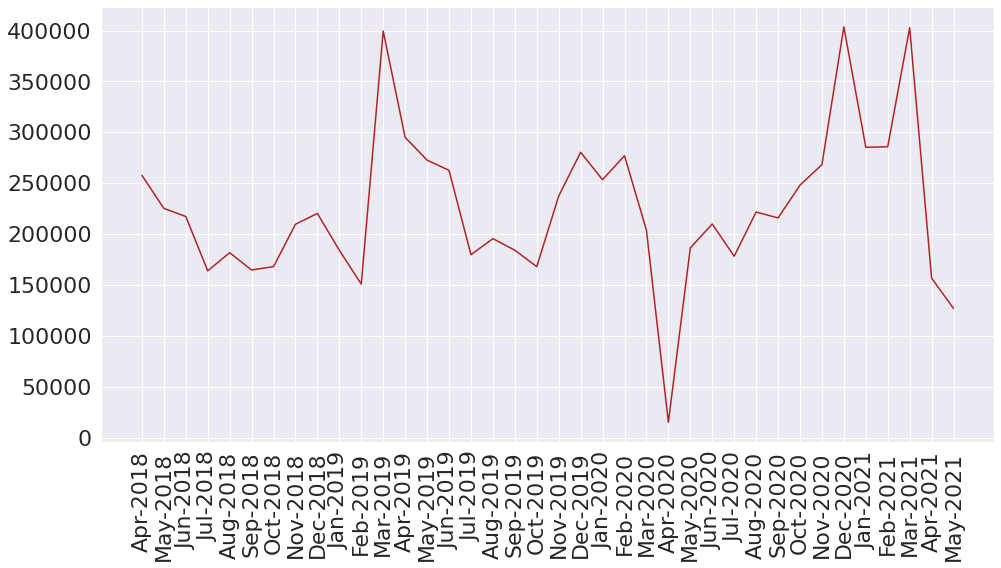

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df.iloc[:,3:].sum(), color = 'firebrick')
plt.xticks(rotation='90')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

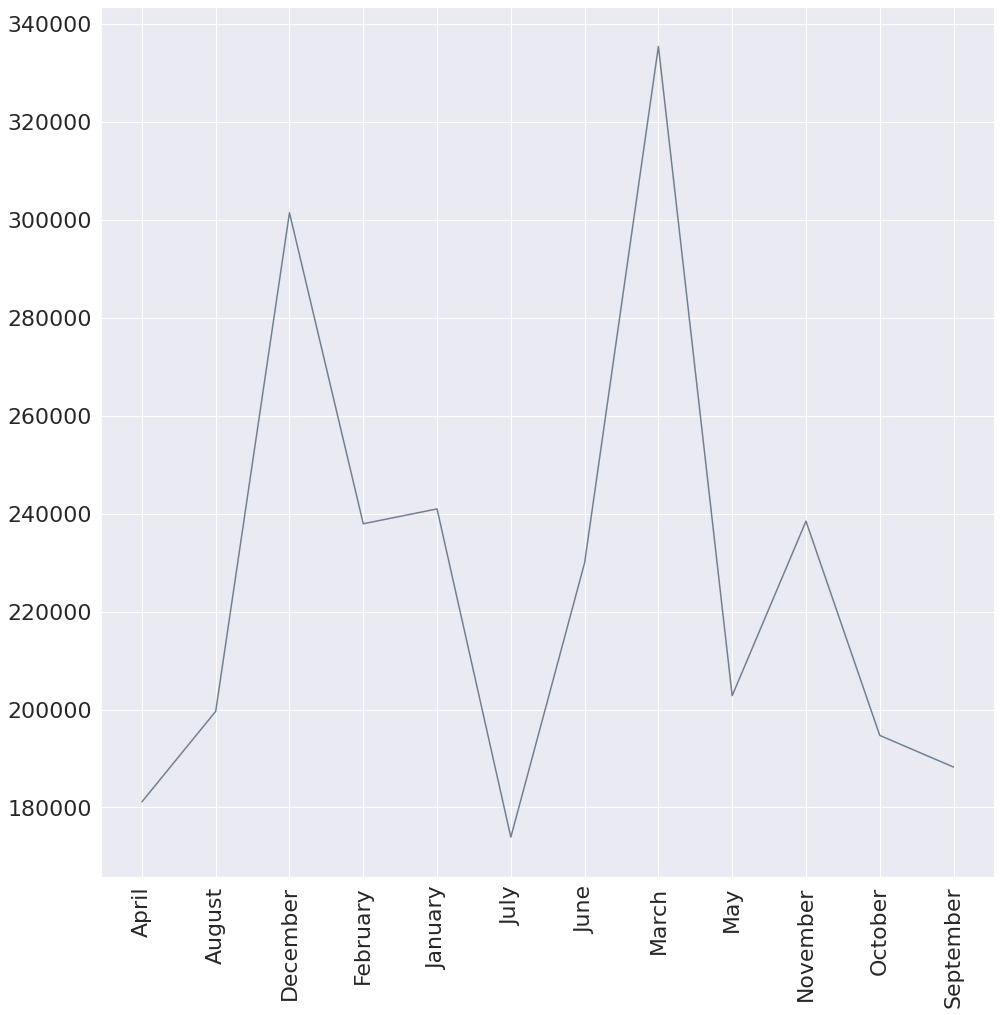

In [8]:
plt.figure(figsize=(16,16))
time_plot_data = time_data.groupby(time_data.index.month_name()).mean().sum(axis=1)
sns.lineplot(x=time_plot_data.index,y=time_plot_data.values, color = 'slategrey')#'firebrick')
plt.xticks(rotation='vertical')

In [9]:
time_data

,SKU-1,SKU-2,SKU-3,SKU-4,SKU-5,SKU-6,SKU-7,SKU-8,SKU-9,SKU-10,...,SKU-221,SKU-224,SKU-225,SKU-226,SKU-228,SKU-229,SKU-230,SKU-231,SKU-232,SKU-233
2018-04-01,27,88,6,162,171,4,1179,406,264,8,...,32,118,145,4,15,7,49,21,15,252
2018-05-01,13,28,6,184,402,4,435,652,244,8,...,24,139,65,36,15,7,25,13,13,105
2018-06-01,30,127,6,110,627,4,335,844,159,8,...,22,56,157,40,15,7,41,13,13,33
2018-07-01,14,130,6,172,615,52,719,541,204,8,...,36,61,225,20,15,7,13,21,11,39
2018-08-01,22,58,6,90,300,4,791,703,84,8,...,46,131,81,4,15,7,21,29,9,15
2018-09-01,8,10,6,40,417,12,783,634,129,8,...,52,211,325,84,15,7,53,21,11,33
2018-10-01,8,7,6,18,141,4,875,523,248,8,...,40,37,169,36,15,7,33,21,36,93
2018-11-01,8,7,6,26,42,4,935,688,166,8,...,34,115,489,148,15,7,21,29,15,69
2018-12-01,8,7,6,18,72,4,1407,1267,273,8,...,40,331,449,84,15,7,67,13,21,57
2019-01-01,8,13,6,66,33,4,699,463,186,8,...,56,218,497,4,15,7,21,13,15,213


In [10]:
# time_data_1.groupby(time_data.index.month_name()).mean().T.groupby(df.warehouse_id).mean().T.plot(kind='bar')

In [11]:
# time_data.groupby(time_data.index.month_name()).mean().T.groupby(df.warehouse_id).median().T.plot(kind='bar')

<AxesSubplot:title={'center':'Avg. Sales in each warehouse'}, xlabel='warehouse_id'>

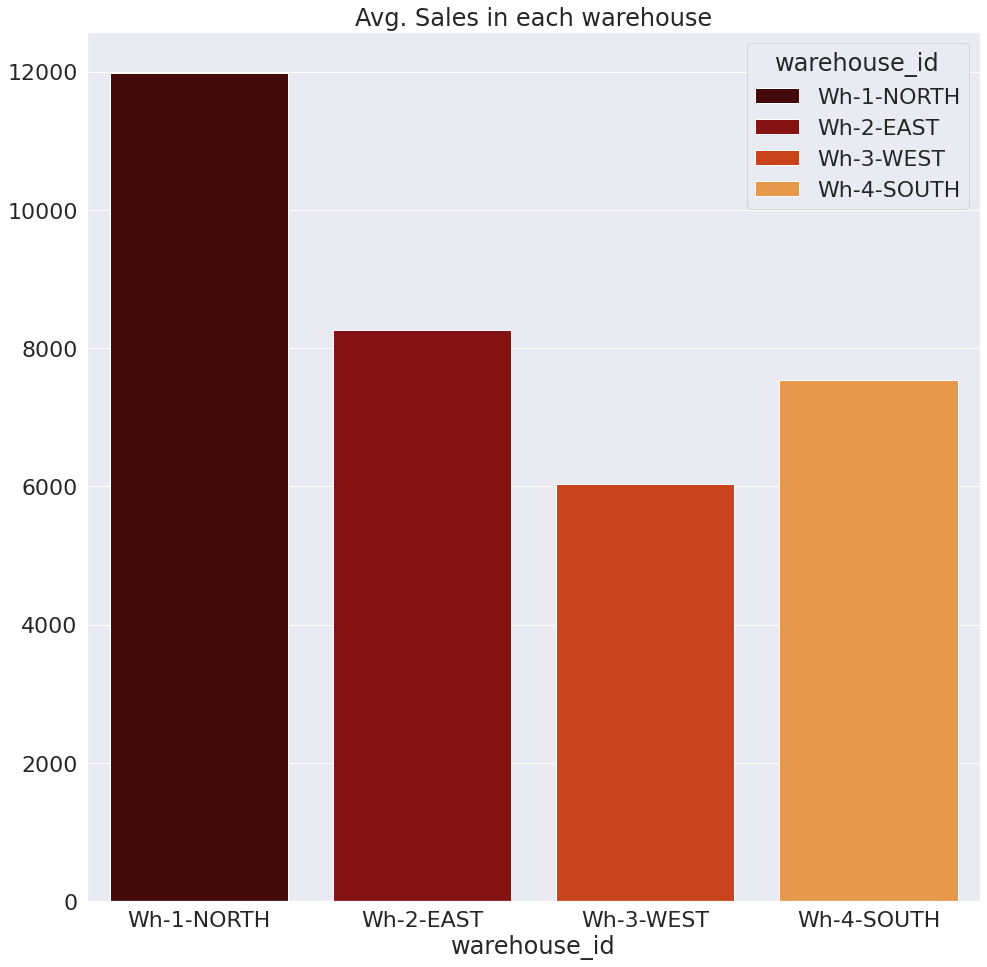

In [12]:
plt.figure(figsize=(16,16))
sales=df.iloc[:,3:].sum(axis=1)
sales_d = sales.groupby(df.warehouse_id).describe()['mean']
plt.title('Avg. Sales in each warehouse')
sns.barplot(x=sales_d.index,y=sales_d.values,hue=sales_d.index,palette=palette_name,dodge=False)

$y=x^3+5x^2-12$
***232323***

<AxesSubplot:xlabel='warehouse_id'>

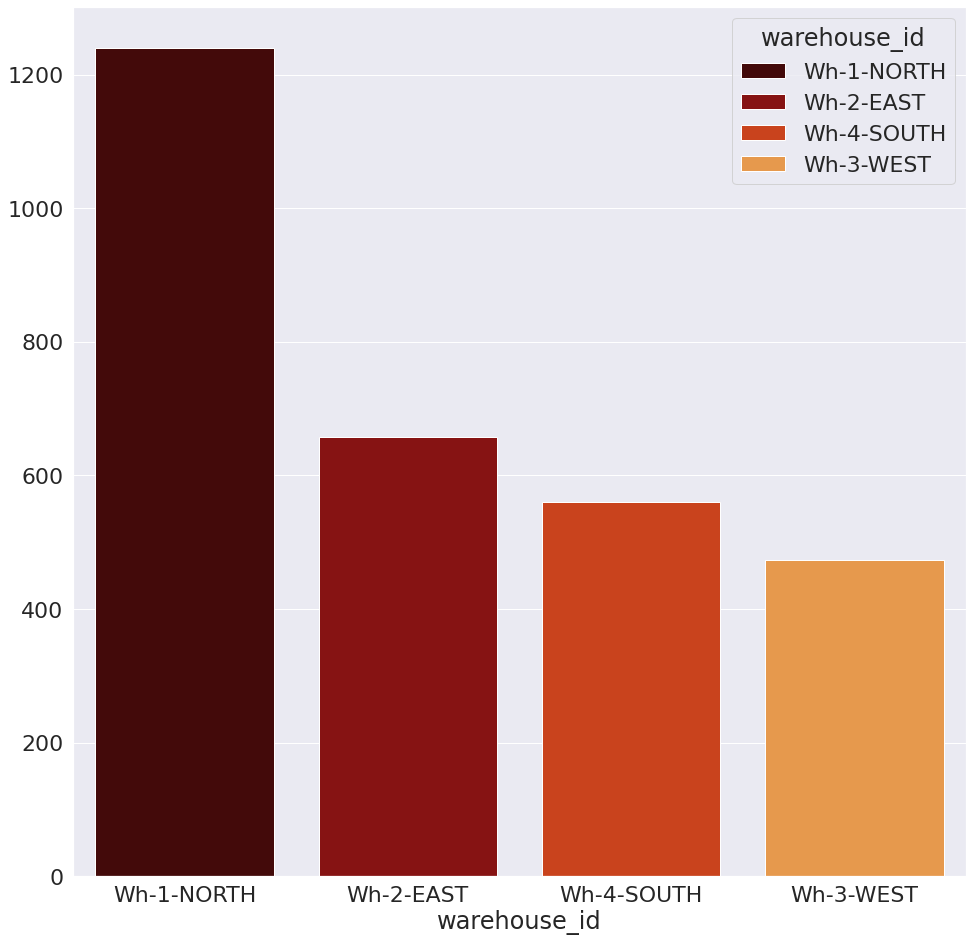

In [13]:
plt.figure(figsize=(16,16))
sales=df.iloc[:,24:27].sum(axis=1)
sales_d = sales.groupby(df.warehouse_id)
sales_d  = sales_d.describe()['mean'].sort_values(ascending=False)
sns.barplot(x=sales_d.index,y=sales_d.values,hue=sales_d.index,palette=palette_name,dodge=False)
# sales_d.sum()


In [14]:
def tt_split(data):
    x_val=train_df[train_df.mm_yy==train_df.mm_yy.max()]
    x_train=train_df[train_df.mm_yy!=train_df.mm_yy.max()]
    return x_train.drop(columns=["target","mm_yy"]),x_val.drop(columns=["target","mm_yy"]),x_train.target,x_val.target


def tt_model(model,x,y,isval=False):
    if not isval:
        model.fit(x,y)
    y_pred=model.predict(x)
    
    tag='Train'
    if isval:
        tag="Validation"
        
    print(f"{tag} Mape error: {mean_absolute_percentage_error(y,y_pred)}")
    return model, y_pred

def get_datapoints(ts,lags=13):
    banda_high_hai= [
        'Jun-2018',
         'Feb-2019',
         'Mar-2019',
         'Apr-2019',
         'Jun-2019',
         'Jul-2019',
         'Mar-2020',
         'Apr-2020',
         'May-2020',
         'Jun-2020',
         'Mar-2021',
         'Apr-2021',
    ]
    
    index=ts.index
    value=ts.values
    
    x=[]
    y=[]
    for i in range(lags,len(index)):
        features=[]
        
        expanding=value[:i]
        temp=np.array(value[i-lags:i])
        features.extend(temp[[0,1,2,7,11,12]].tolist())
        f1=0
        if index[i] in banda_high_hai:
            f1=1

        
        mean=temp[-4:].mean()
        std=temp[-4:].std()
        
        features.extend([index[i],f1,mean,std,expanding.mean(),expanding.std(),temp[[0,1,2,7,11,12]].mean()])
        
        x.append(features)
        y.append(value[i])
    return x,y
           

In [15]:
# c=0
df.drop(columns=['region'],inplace=True)

for warehouse_id in df.warehouse_id.unique():
    print(warehouse_id)
    XX=df[df.warehouse_id==warehouse_id].drop(columns=["sku_id","warehouse_id"])
    X=[]
    Y=[]
    x_test=[]

    for prod_ts in XX.iterrows():
        lags=13
        x,y=get_datapoints(prod_ts[1][:],lags)
        X.extend(x)
        Y.extend(y)
    
#     x_test.append(prod_ts[1][-1*lags-4:-4].tolist())
#     x_test[-1].append(prod_ts[1].index[-5])
#     x_test[-1].extend(prod_ts[1][-4:].tolist())
    train_df=pd.DataFrame(X)
    train_df.columns=[f"lag_{i}" for i in [13,12,11,6,2,1]]+["mm_yy","f1",'mean','std',"exanding_mean","exanding_std","mean2"]
    
    train_df.mm_yy=pd.to_datetime(train_df.mm_yy)
    train_df['month']=train_df.mm_yy.dt.month
    train_df['year']=train_df.mm_yy.dt.year
    # train_df['quarter']=train_df.mm_yy.dt.quarter
    train_df["target"]=Y
    print(sum(train_df.duplicated()))
    train_df.drop_duplicates(inplace=True)
    # train_df.drop(columns=['mm_yy'],inplace=True)

    
    # x_train,x_val,y_train,y_val=model_selection.train_test_split(train_df.drop(columns=["mm_yy"]),train_df.target,test_size=0.2,shuffle=True)
    x_train,x_val,y_train,y_val=tt_split(train_df)
    

    models_list=[
        ['rmf',ensemble.RandomForestRegressor(n_jobs=-1)],
        ['gbm',ensemble.GradientBoostingRegressor()],
        ['xgb',XGBRegressor()],
        ['lgbm',LGBMRegressor()],
        ['svm',svm.SVR()],
    #     ['knn',neighbors.KNeighborsRegressor()]
    ]

    for name, model in models_list:
        if name in ['lr','knn','svm']:
            minmax=preprocessing.MinMaxScaler()
            x_train_f,x_val_f=minmax.fit_transform(x_train),minmax.transform(x_val)
        else:
            x_train_f,x_val_f=x_train.copy(),x_val.copy()
        print(name)
        model,_=tt_model(model,x_train_f,y_train)
        model,_=tt_model(model,x_val_f,y_val,isval=True)
        print('-'*50)
#     break
    
    print("\n\n\n")

Wh-1-NORTH
742
rmf
Train Mape error: 2.2156929548056037
Validation Mape error: 8.567421046030438
--------------------------------------------------
gbm
Train Mape error: 4.50835666151627
Validation Mape error: 6.5393585711909195
--------------------------------------------------
xgb
Train Mape error: 1.3136755456239784
Validation Mape error: 7.337974292526163
--------------------------------------------------
lgbm
Train Mape error: 3.6532896515468636
Validation Mape error: 5.041576363390579
--------------------------------------------------
svm
Train Mape error: 3.895273535881055
Validation Mape error: 6.676119109439937
--------------------------------------------------




Wh-2-EAST
561
rmf
Train Mape error: 2.280839416231175
Validation Mape error: 19.631297154179762
--------------------------------------------------
gbm
Train Mape error: 4.4195481979976385
Validation Mape error: 16.50628498421779
--------------------------------------------------
xgb
Train Mape error: 1.0891876066064

In [16]:
XX

,Apr-2018,May-2018,Jun-2018,Jul-2018,Aug-2018,Sep-2018,Oct-2018,Nov-2018,Dec-2018,Jan-2019,...,Aug-2020,Sep-2020,Oct-2020,Nov-2020,Dec-2020,Jan-2021,Feb-2021,Mar-2021,Apr-2021,May-2021
753,142,103,37,226,19,40,52,79,58,82,...,31,328,2374,34,19,37,76,73,112,19
754,170,106,22,58,38,18,22,22,58,70,...,42,70,10,38,22,18,50,74,30,50
755,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,23,15
756,196,58,120,54,58,224,204,86,190,108,...,116,4058,954,112,32,200,206,152,190,64
757,250,232,154,244,127,130,232,169,154,58,...,352,2089,730,178,130,154,364,817,727,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,7,7,7,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,49,25,41,13,21,53,33,21,67,21,...,9,9,21,133,9,33,9,103,49,9
1036,21,13,13,21,29,21,21,29,13,13,...,13,13,13,13,13,21,13,13,13,13
1037,15,13,13,11,9,11,36,15,21,15,...,9,9,17,13,11,36,21,17,9,9


Text(0.5, 0, 'Relative Importance')

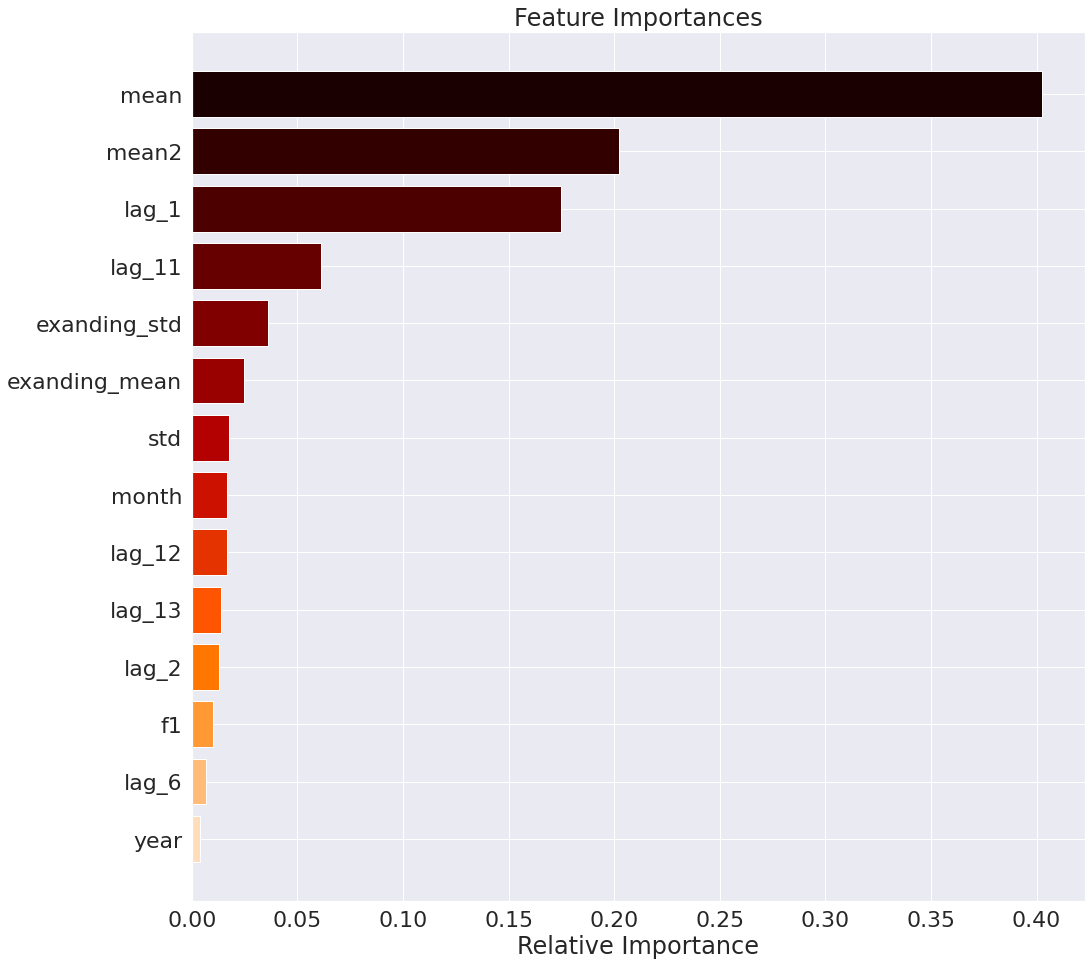

In [17]:
features=x_train.columns
importances = models_list[1][1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,16))
plt.title('Feature Importances')
palette_0 = sns.color_palette(palette_name,n_colors=len(indices))
palette_0.reverse()
plt.barh(range(len(indices)), importances[indices], align='center',color=palette_0)
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [18]:
features

Index(['lag_13', 'lag_12', 'lag_11', 'lag_6', 'lag_2', 'lag_1', 'f1', 'mean',
       'std', 'exanding_mean', 'exanding_std', 'mean2', 'month', 'year'],
      dtype='object')

<AxesSubplot:>

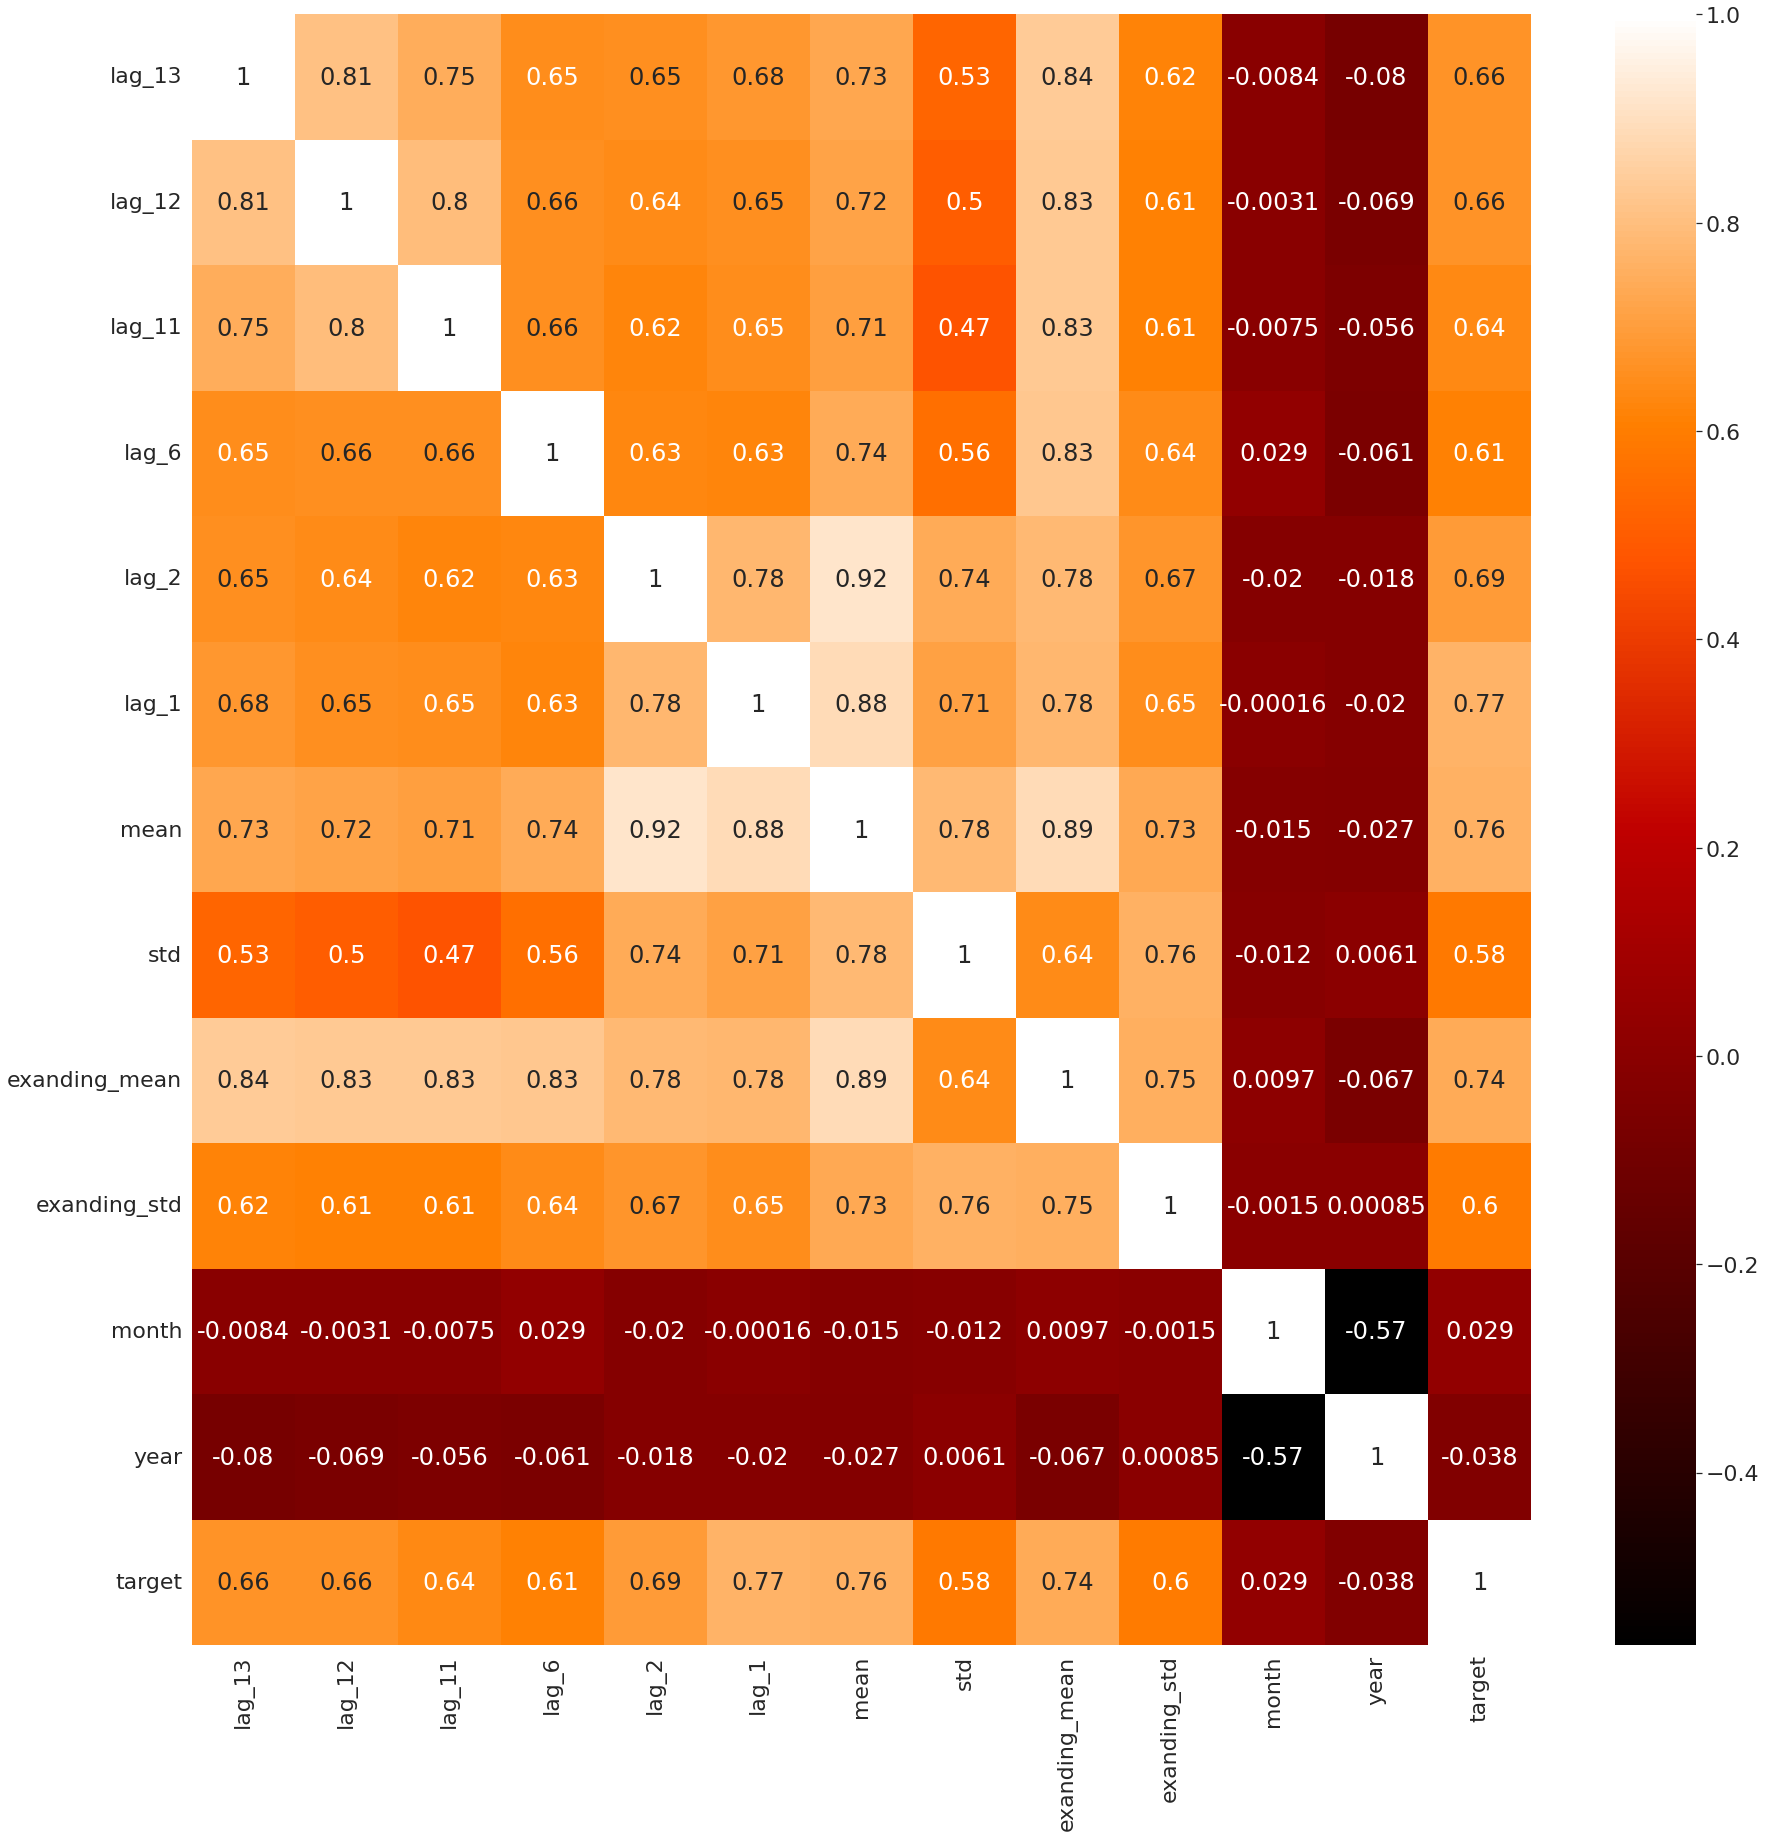

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df[['lag_13', 'lag_12', 'lag_11', 'lag_6', 'lag_2', 'lag_1', 'mean', 'std',
       'exanding_mean', 'exanding_std', 'month', 'year', 'target']].corr(),annot=True,cmap = palette_name)

In [20]:
# from statsmodels.graphics.tsaplots import plot_pacf
# # series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# dd=df.sample(n=50)
# for i in range(50):
    
#     plot_pacf(dd.iloc[i,2:], lags=15)
#     plt.show()

/home/piranha/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/piranha/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

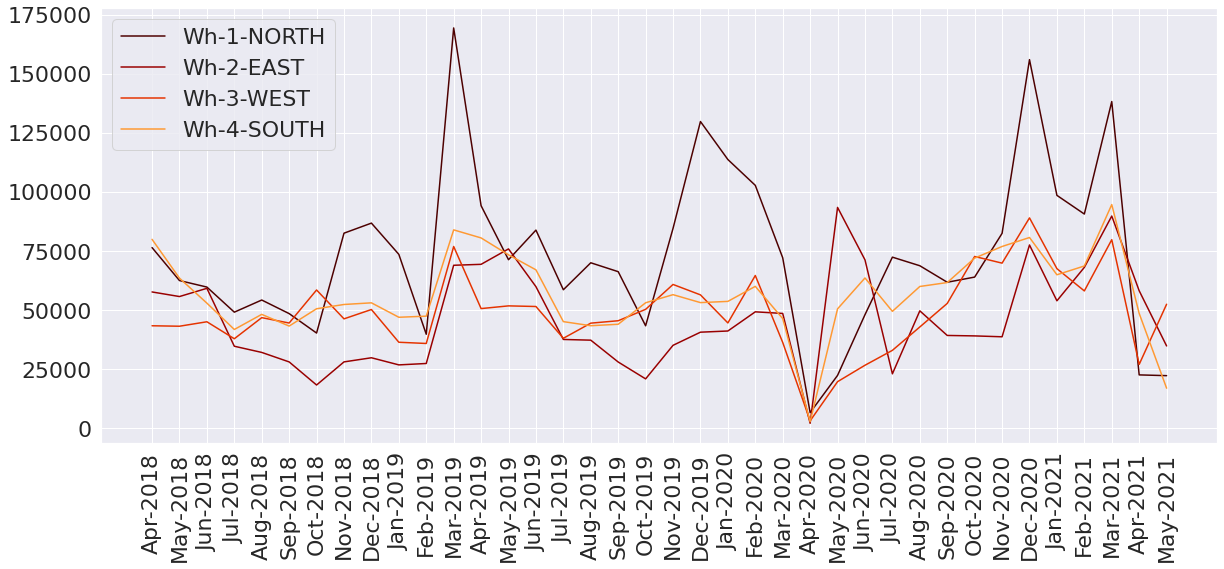

In [21]:
plt.figure(figsize=(20,8))
palette_1 = sns.color_palette(palette_name,len(df.warehouse_id.unique()))
for wid,palette_1i in zip(df.warehouse_id.unique(),palette_1):
#     print(wid)
    s=df[df.warehouse_id==wid].drop(columns=["sku_id","warehouse_id"]).sum(axis=0)
    sns.lineplot(s.index,s.values.astype(int),color=palette_1i)
    
#     plt.show()
_=plt.xticks(rotation="90")
plt.legend(df.warehouse_id.unique())
plt.show()

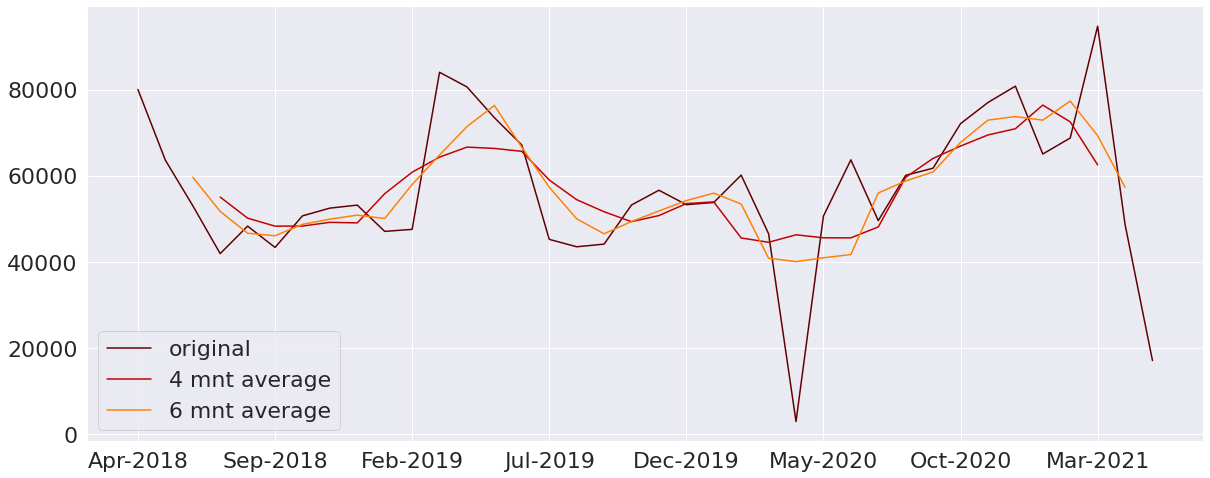

In [22]:
plt.figure(figsize=(20,8))
df_6m_mean = s.rolling(6, center=True).mean()
df_4m_mean = s.rolling(4, center=True).mean()
df_4m_std = s.rolling(4, center=True).std()
df_6m_std = s.rolling(6, center=True).std()
palette_2 = sns.color_palette(palette_name,3)
s.plot(color = palette_2[0])
df_6m_mean.plot(color = palette_2[1])
df_4m_mean.plot(color = palette_2[2])
plt.legend(['original','4 mnt average','6 mnt average'])


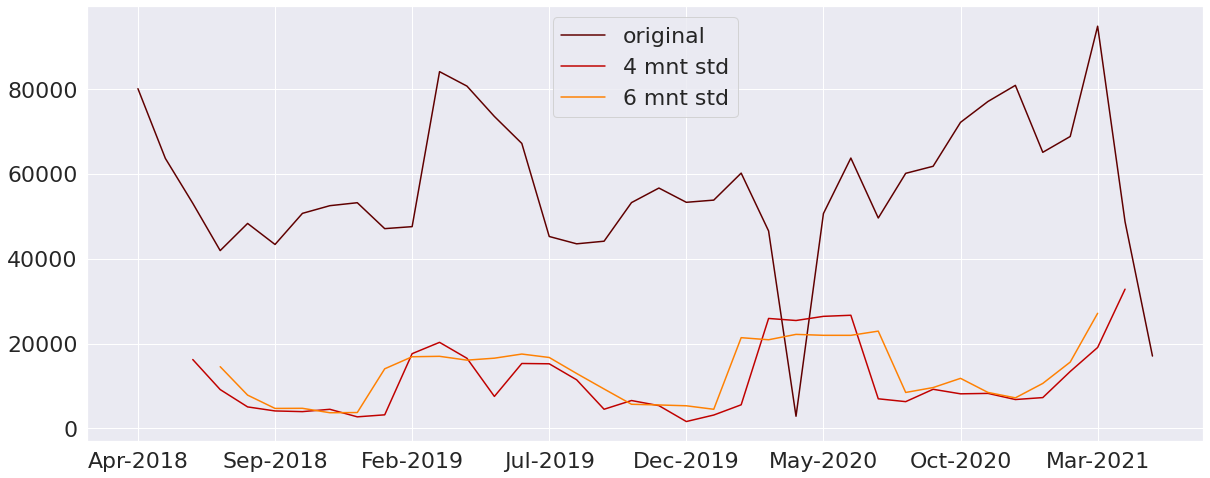

In [23]:
plt.figure(figsize=(20,8))
s.plot(color = palette_2[0])
df_4m_std.plot(color = palette_2[1])
df_6m_std.plot(color = palette_2[2])
plt.legend(['original','4 mnt std','6 mnt std'])


([<matplotlib.axis.YTick at 0x7f0f982a95e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

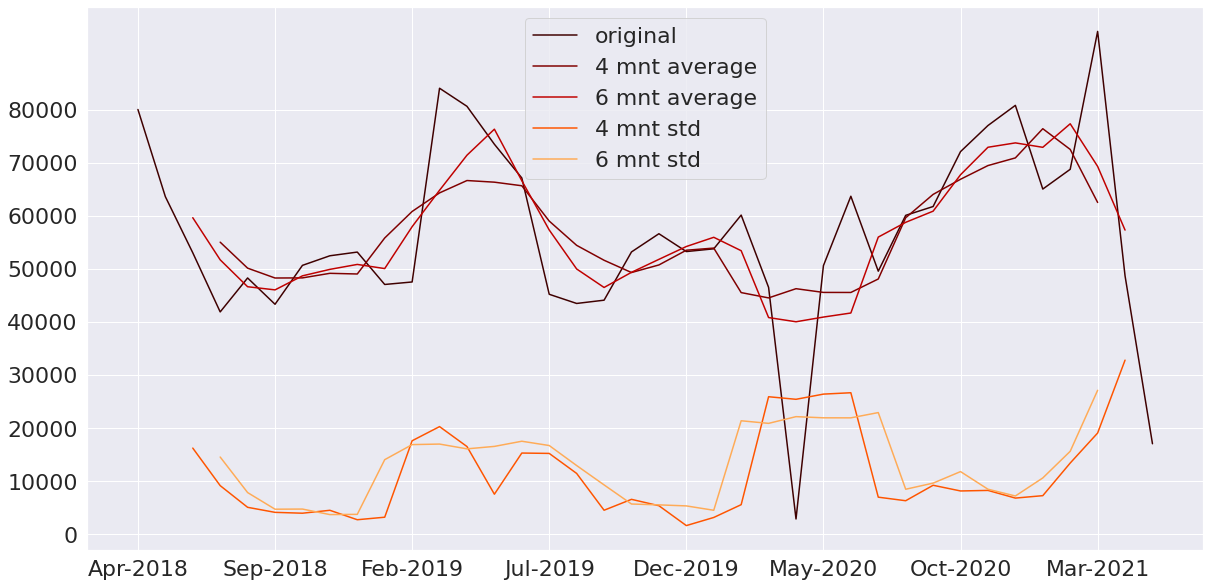

In [24]:
plt.figure(figsize=(20,10))
palette_2 = sns.color_palette(palette_name,5)
s.plot(color = palette_2[0])
df_6m_mean.plot(color = palette_2[1])
df_4m_mean.plot(color = palette_2[2])
df_4m_std.plot(color = palette_2[3])
df_6m_std.plot(color = palette_2[4])
plt.legend(['original','4 mnt average','6 mnt average','4 mnt std','6 mnt std'])
plt.yticks(np.arange(0, 90000, step=10000))

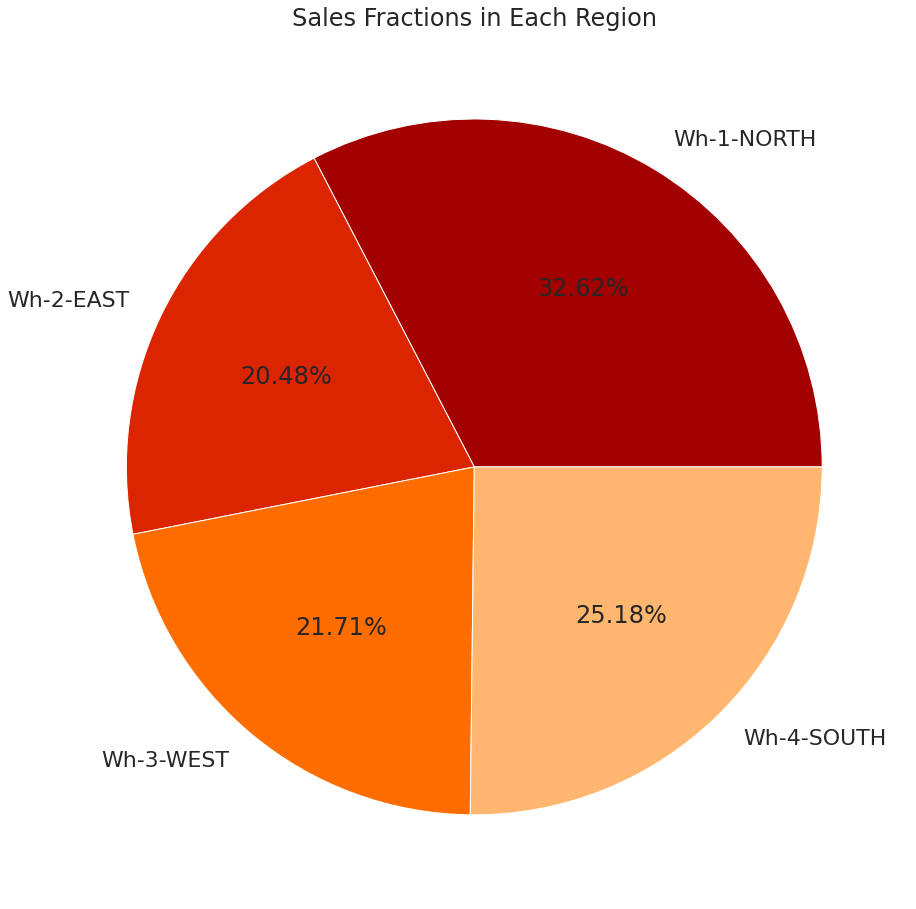

In [25]:
plt.figure(figsize=(16,16))
sales_total = df.groupby('warehouse_id').sum().T.sum()
plt.pie(sales_total.values,labels=sales_total.index,colors=sns.color_palette(palette_name,6)[2:],autopct='%.2f%%')
plt.title('Sales Fractions in Each Region')
plt.show()

In [26]:
%pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [27]:
# time_data_1 = df.copy()
# time_data_1.drop(columns=['sku_id'],inplace=True)

In [28]:
# time_data_1.index = time_data_1['warehouse_id']
# time_data_1.drop(columns=['warehouse_id'],inplace = True)
# time_data_1

In [29]:
# sns.barplot(data = time_data_1.groupby(time_data_1.index).mean(),)

In [30]:
# plt.figure(figsize=(20,8))
# time_data_1.groupby(time_data_1.T.index).mean().T.groupby(df.warehouse_id).mean().T.plot(kind='bar')

In [31]:

# time_data_1.groupby(time_data.index.month_name()) #.mean().T.groupby(df.warehouse_id).mean().T.plot(kind='bar')

In [32]:
time_data_1=df.T.iloc[0:]
time_data_1=time_data_1.drop(['sku_id'],axis=0)
time_data_1.columns=time_data_1.iloc[0,:].tolist()
time_data_1=time_data_1.iloc[1:,:].astype(int)
time_data_1.index=pd.to_datetime(time_data_1.index)
time_data_1

,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,Wh-1-NORTH,...,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH,Wh-4-SOUTH
2018-04-01,27,88,6,162,171,4,1179,406,264,8,...,32,118,145,4,15,7,49,21,15,252
2018-05-01,13,28,6,184,402,4,435,652,244,8,...,24,139,65,36,15,7,25,13,13,105
2018-06-01,30,127,6,110,627,4,335,844,159,8,...,22,56,157,40,15,7,41,13,13,33
2018-07-01,14,130,6,172,615,52,719,541,204,8,...,36,61,225,20,15,7,13,21,11,39
2018-08-01,22,58,6,90,300,4,791,703,84,8,...,46,131,81,4,15,7,21,29,9,15
2018-09-01,8,10,6,40,417,12,783,634,129,8,...,52,211,325,84,15,7,53,21,11,33
2018-10-01,8,7,6,18,141,4,875,523,248,8,...,40,37,169,36,15,7,33,21,36,93
2018-11-01,8,7,6,26,42,4,935,688,166,8,...,34,115,489,148,15,7,21,29,15,69
2018-12-01,8,7,6,18,72,4,1407,1267,273,8,...,40,331,449,84,15,7,67,13,21,57
2019-01-01,8,13,6,66,33,4,699,463,186,8,...,56,218,497,4,15,7,21,13,15,213


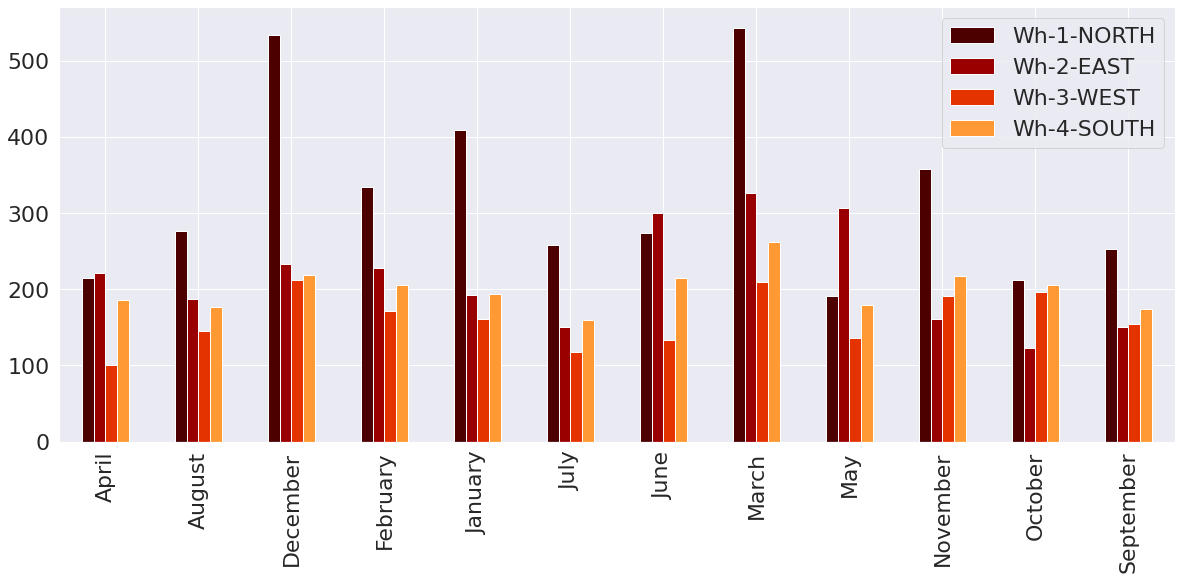

In [33]:
palette_3 = sns.color_palette(palette_name,4)
grouped_sales_1 = time_data_1.groupby(time_data_1.index.month_name()).mean().T.groupby(time_data_1.columns).mean().T.plot(kind='bar',figsize=(20,8),color = palette_3)
# sns.barplot(grouped_sales_1)
# sns.barplot(data= grouped_sales_1, x = grouped_sales_1.index, y= 'sales' ,hue = grouped_sales_1.index, )

In [34]:
grouped_sales_1

<AxesSubplot:>

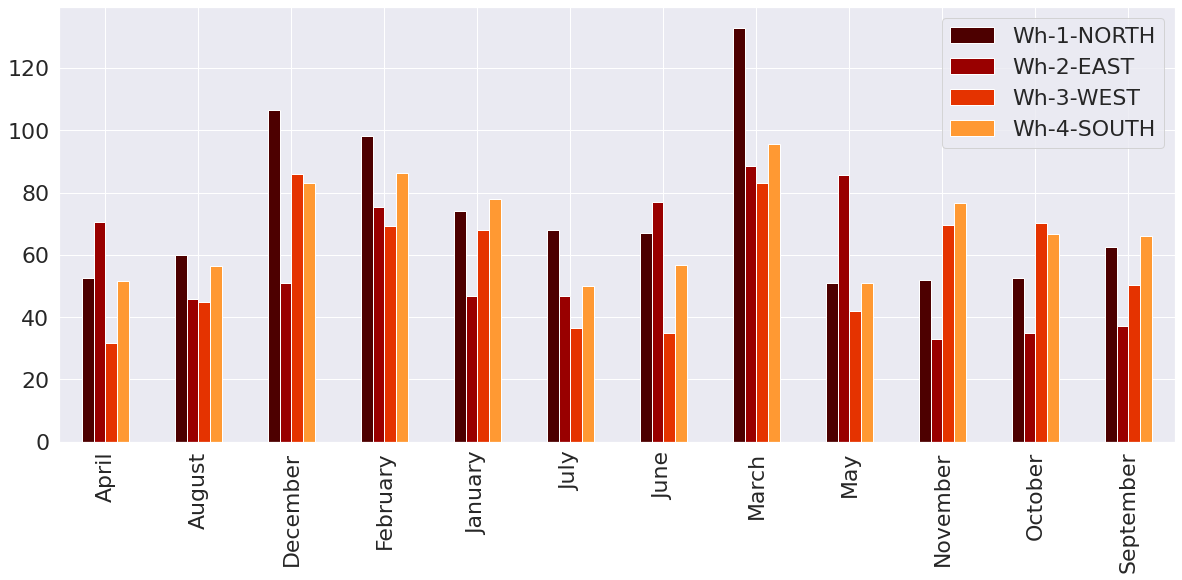

In [35]:
grouped_sales_1 = time_data_1.groupby(time_data_1.index.month_name()).mean().T.groupby(time_data_1.columns).median().T.plot(kind='bar',figsize=(20,8),color = palette_3)

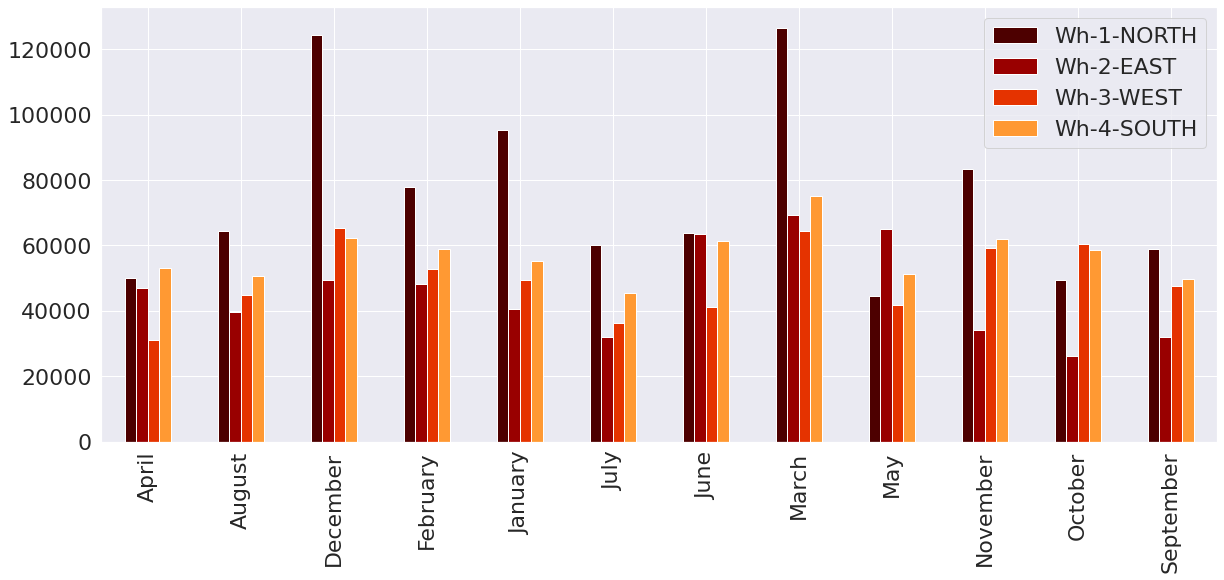

In [36]:
grouped_sales_1 = time_data_1.groupby(time_data_1.index.month_name()).mean().T.groupby(time_data_1.columns).sum().T.plot(kind='bar',figsize=(20,8),color = palette_3)